In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath= ("/Users/bhupathiraju_renisha/Desktop/Climate/cleaned_data.csv")

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.head()

,datetime (UTC),"coordinates (lat,lon)",temperature (degC),total_precipitation (mm of water equivalent),relative_humidity (0-1),model (name),model elevation (surface),utc_offset (hrs),10m_u_component_of_wind (m/s),10m_v_component_of_wind (m/s)
0,2005-01-01 00:00:00,"(17.361362, 78.474525)",17.94,0.0,0.91,era5,563.89,5.5,-2.04,1.87
1,2005-01-01 01:00:00,"(17.361362, 78.474525)",17.92,0.0,0.93,era5,563.89,5.5,-2.10,1.83
2,2005-01-01 02:00:00,"(17.361362, 78.474525)",19.86,0.0,0.87,era5,563.89,5.5,-2.61,2.36
3,2005-01-01 03:00:00,"(17.361362, 78.474525)",20.47,0.0,0.82,era5,563.89,5.5,-2.76,2.78
4,2005-01-01 04:00:00,"(17.361362, 78.474525)",21.34,0.0,0.75,era5,563.89,5.5,-2.79,2.99


In [5]:
df.tail()

,datetime (UTC),"coordinates (lat,lon)",temperature (degC),total_precipitation (mm of water equivalent),relative_humidity (0-1),model (name),model elevation (surface),utc_offset (hrs),10m_u_component_of_wind (m/s),10m_v_component_of_wind (m/s)
175315,2024-12-31 19:00:00,"(17.361362, 78.474525)",21.07,0.01,0.77,era5,563.89,5.5,-1.75,-0.42
175316,2024-12-31 20:00:00,"(17.361362, 78.474525)",19.95,0.00,0.81,era5,563.89,5.5,-1.68,-0.32
175317,2024-12-31 21:00:00,"(17.361362, 78.474525)",19.30,0.00,0.83,era5,563.89,5.5,-1.47,-0.45
175318,2024-12-31 22:00:00,"(17.361362, 78.474525)",18.76,0.00,0.89,era5,563.89,5.5,-1.49,-0.38
175319,2024-12-31 23:00:00,"(17.361362, 78.474525)",18.23,0.00,0.90,era5,563.89,5.5,-2.09,-0.74


In [6]:
df.shape

(175320, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   datetime (UTC)                                175320 non-null  object 
 1   coordinates (lat,lon)                         175320 non-null  object 
 2   temperature (degC)                            175320 non-null  float64
 3   total_precipitation (mm of water equivalent)  175320 non-null  float64
 4   relative_humidity (0-1)                       175320 non-null  float64
 5   model (name)                                  175320 non-null  object 
 6   model elevation (surface)                     175320 non-null  float64
 7   utc_offset (hrs)                              175320 non-null  float64
 8   10m_u_component_of_wind (m/s)                 175320 non-null  float64
 9   10m_v_component_of_wind (m/s)                 17

In [8]:
df.dtypes

datetime (UTC)                                   object
coordinates (lat,lon)                            object
temperature (degC)                              float64
total_precipitation (mm of water equivalent)    float64
relative_humidity (0-1)                         float64
model (name)                                     object
model elevation (surface)                       float64
utc_offset (hrs)                                float64
10m_u_component_of_wind (m/s)                   float64
10m_v_component_of_wind (m/s)                   float64
dtype: object

In [9]:
df.isnull().sum()

datetime (UTC)                                  0
coordinates (lat,lon)                           0
temperature (degC)                              0
total_precipitation (mm of water equivalent)    0
relative_humidity (0-1)                         0
model (name)                                    0
model elevation (surface)                       0
utc_offset (hrs)                                0
10m_u_component_of_wind (m/s)                   0
10m_v_component_of_wind (m/s)                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

datetime (UTC)
2005-01-01 00:00:00    1
2018-05-03 03:00:00    1
2018-05-02 19:00:00    1
2018-05-02 20:00:00    1
2018-05-02 21:00:00    1
                      ..
2011-09-02 01:00:00    1
2011-09-02 02:00:00    1
2011-09-02 03:00:00    1
2011-09-02 04:00:00    1
2024-12-31 23:00:00    1
Name: count, Length: 175320, dtype: int64
******************************
coordinates (lat,lon)
(17.361362, 78.474525)    175320
Name: count, dtype: int64
******************************
model (name)
era5    175320
Name: count, dtype: int64
******************************


In [21]:
df.columns = df.columns.str.strip()

In [22]:
df.rename(columns={
    'datetime (UTC)': 'Datetime',
    'coordinates (lat,lon)': 'Coordinates',
    'temperature (degC)': 'Temperature',
    'total_precipitation (mm of water equivalent)': 'Total Precipitation',
    'relative_humidity (0-1)': 'Relative Humidity',
    'model (name)': 'Model',
    'model elevation (surface)': 'Model Elevation',
    'utc_offset (hrs)': 'Utc Offset',
    '10m_u_component_of_wind (m/s)': 'U Wind Component',
    '10m_v_component_of_wind (m/s)': 'V Wind Component'
}, inplace=True)

In [23]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [24]:
df['Coordinates'] = df['Coordinates'].str.replace(r'[()]', '', regex=True)
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(',', expand=True)

In [25]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

In [27]:
df['Latitude'] = df['Latitude'].fillna(0)
df['Longitude'] = df['Longitude'].fillna(0)

In [51]:
print(df.columns.tolist())

['Datetime', 'Temperature', 'Total Precipitation', 'Relative Humidity', 'Model', 'Wind Speed', 'Wind Direction']


In [52]:
df['Total Precipitation'] = df['Total Precipitation'].clip(lower=0)
df['Relative Humidity'] = df['Relative Humidity'].clip(0, 1)
df['Model'] = df['Model'].astype('category')

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Datetime             175320 non-null  datetime64[ns]
 1   Coordinates          175320 non-null  object        
 2   Temperature          175320 non-null  float64       
 3   Total Precipitation  175320 non-null  float64       
 4   Relative Humidity    175320 non-null  float64       
 5   Model                175320 non-null  category      
 6   Model Elevation      175320 non-null  float64       
 7   Utc Offset           175320 non-null  int64         
 8   U Wind Component     175320 non-null  float64       
 9   V Wind Component     175320 non-null  float64       
 10  Latitude             175320 non-null  float64       
 11  Longitude            175320 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(8), int64(1), object(1)
memor

In [30]:
print(df[['Latitude', 'Longitude']].head())

    Latitude  Longitude
0  17.361362  78.474525
1  17.361362  78.474525
2  17.361362  78.474525
3  17.361362  78.474525
4  17.361362  78.474525


In [31]:
df.drop('Coordinates', axis=1, inplace=True)

In [33]:
print(df.columns)

Index(['Datetime', 'Temperature', 'Total Precipitation', 'Relative Humidity',
       'Model', 'Model Elevation', 'Utc Offset', 'U Wind Component',
       'V Wind Component', 'Latitude', 'Longitude'],
      dtype='object')


In [34]:
print(df.describe())

                  Datetime    Temperature  Total Precipitation  \
count               175320  175320.000000        175320.000000   
mean   2015-01-01 11:30:00      26.330542             0.101513   
min    2005-01-01 00:00:00       9.650000            -0.000000   
25%    2010-01-01 05:45:00      23.370000             0.000000   
50%    2015-01-01 11:30:00      26.000000             0.000000   
75%    2020-01-01 17:15:00      29.230000             0.010000   
max    2024-12-31 23:00:00      42.320000            21.240000   
std                    NaN       4.837251             0.435262   

       Relative Humidity  Model Elevation  Utc Offset  U Wind Component  \
count      175320.000000     1.753200e+05    175320.0     175320.000000   
mean            0.632530     5.638900e+02         6.0          0.698927   
min             0.070000     5.638900e+02         6.0         -8.910000   
25%             0.470000     5.638900e+02         6.0         -1.780000   
50%             0.650000     5

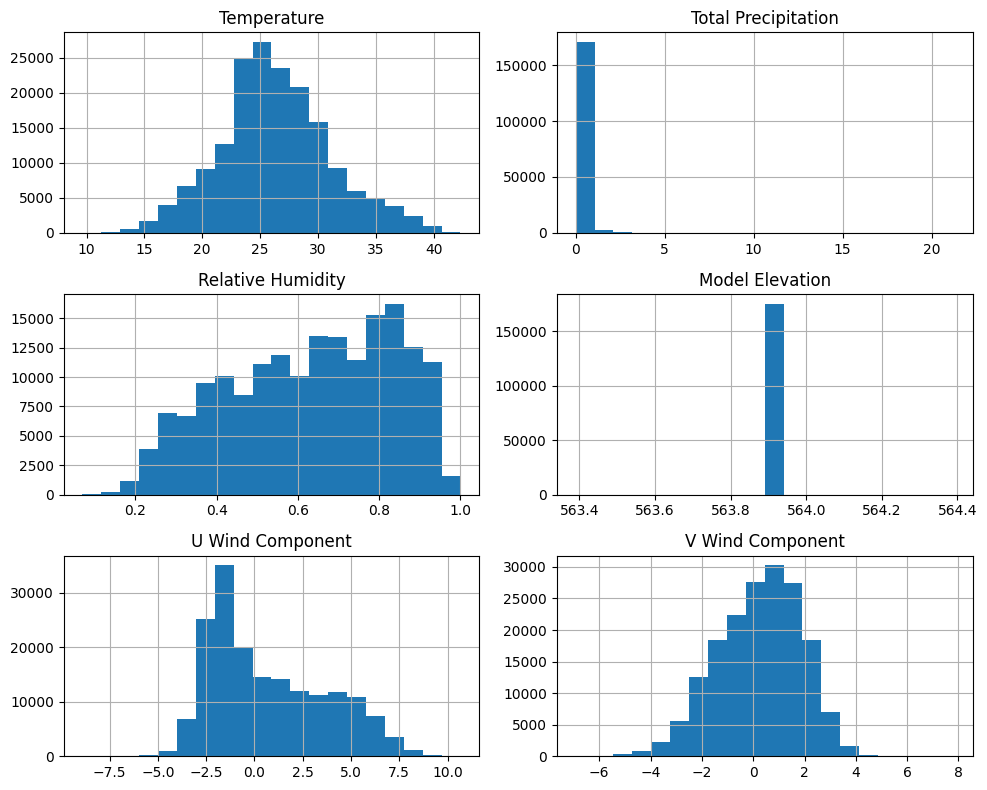

In [35]:
df[['Temperature', 'Total Precipitation', 'Relative Humidity', 
    'Model Elevation', 'U Wind Component', 'V Wind Component']].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

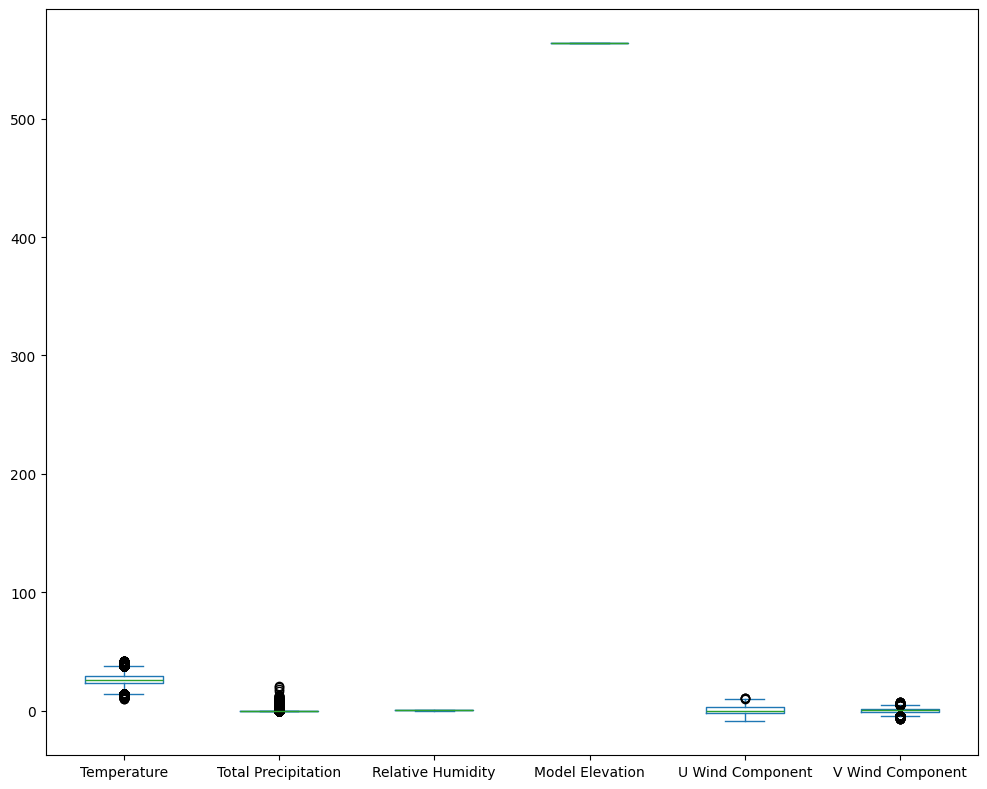

In [38]:
df[['Temperature', 'Total Precipitation', 'Relative Humidity', 
    'Model Elevation', 'U Wind Component', 'V Wind Component']].plot(kind='box', figsize=(10, 8))
plt.tight_layout()
plt.show()

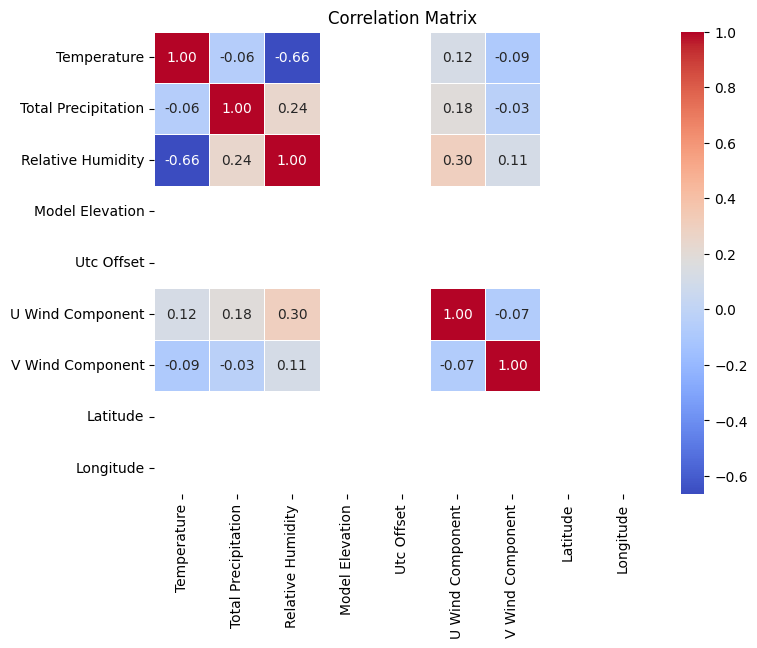

In [42]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [43]:
print(df[['Model Elevation', 'Utc Offset', 'Latitude', 'Longitude']].describe(include='all'))

       Model Elevation  Utc Offset      Latitude     Longitude
count     1.753200e+05    175320.0  1.753200e+05  1.753200e+05
mean      5.638900e+02         6.0  1.736136e+01  7.847453e+01
std       1.136872e-13         0.0  1.065817e-14  1.421090e-14
min       5.638900e+02         6.0  1.736136e+01  7.847452e+01
25%       5.638900e+02         6.0  1.736136e+01  7.847452e+01
50%       5.638900e+02         6.0  1.736136e+01  7.847452e+01
75%       5.638900e+02         6.0  1.736136e+01  7.847452e+01
max       5.638900e+02         6.0  1.736136e+01  7.847452e+01


In [44]:
df = df.drop(columns=['Model Elevation', 'Utc Offset', 'Latitude', 'Longitude'])

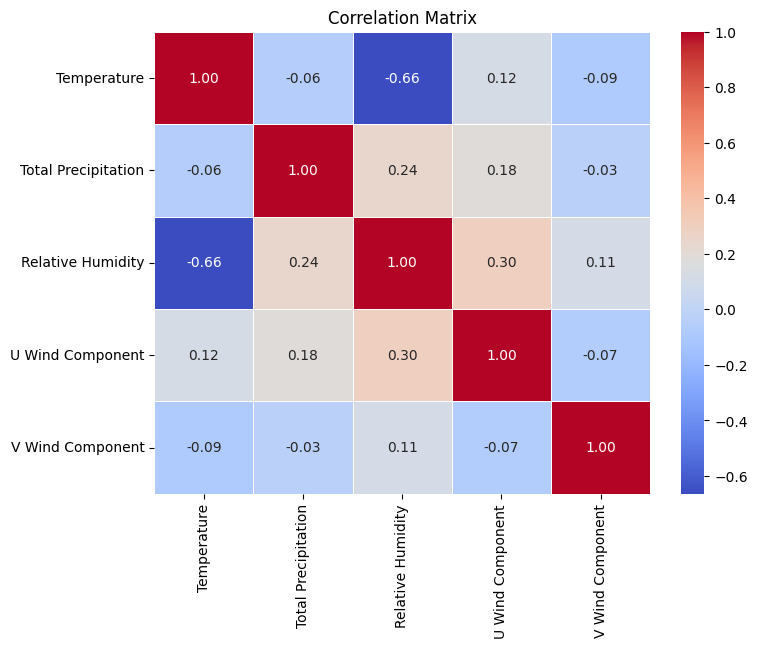

In [45]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
df['Wind Speed'] = np.sqrt(df['U Wind Component']**2 + df['V Wind Component']**2)

In [48]:
df = df.drop(columns=['U Wind Component', 'V Wind Component'])

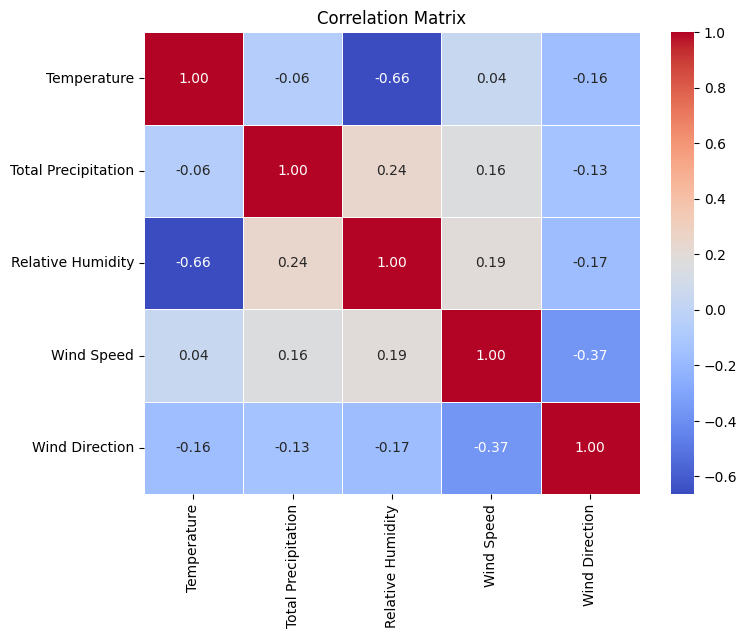

In [49]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()